# Tone generator for "ultracom" project

May 22, 2018

Reference: https://dzone.com/articles/sound-synthesis-numpy

In [10]:
%matplotlib inline

from numpy import linspace, sin, pi, int16, append
from scipy.io.wavfile import write

In [32]:
SAMPLING_RATE = 44100  # Hz
TQ = 0.02  # Time quantum in sec
SEGMENT = TQ * 4  # TQ * N, N >=4
AMPLITUDE = 10000

## Tone synthesis

In [33]:
def note(freqs, length, amp=1, rate=SAMPLING_RATE):
    t = linspace(0, length, int(length * rate))
    data = sin(2 * pi * freqs[0] * t) * amp
    if (len(freqs) > 1):
        for freq in freqs[1:]:
            data += sin(2 * pi * freq * t) * amp
    return data.astype(int16) # two byte integers

## Tone signal

### Symbols

In [34]:
symbols = {"START_OF_FRAME": 16650, "END_OF_FRAME": 16845, "0":17041, "1": 17236, "2": 17431, "3": 17626, "4": 17822, "5": 18017,
           "6": 18212, "7": 18408, "8": 18603, "9": 18798, "A": 18994, "B": 19189, "C": 19384, "D": 19580,
           "E": 19775, "F": 19970}

In [35]:
def signal(data):
    tone = note([symbols["START_OF_FRAME"]], SEGMENT, amp=AMPLITUDE)
    for d in data:
        tone = append(tone, note([symbols[d]], SEGMENT, amp=AMPLITUDE))
    tone = append(tone, note([symbols["END_OF_FRAME"]], SEGMENT, amp=AMPLITUDE))
    tone = append(tone, note([symbols["END_OF_FRAME"]], SEGMENT, amp=AMPLITUDE))
    tone = append(tone, note([symbols["END_OF_FRAME"]], SEGMENT, amp=AMPLITUDE))
    return tone

## Tone generation

In [36]:
WAV_FILE = 'HelloWorld_TQ20msecX4.wav'

In [37]:
# Generate "Hello World!" message
tone = signal(["4", "8", "6", "5", "6", "C", "6", "C", "6", "F", "2", "0", "5", "7", "6", "F", "7", "2", "6", "C", "6", "4", "2", "1"])
# Save it as a wav file on PC
write(WAV_FILE, SAMPLING_RATE, tone)

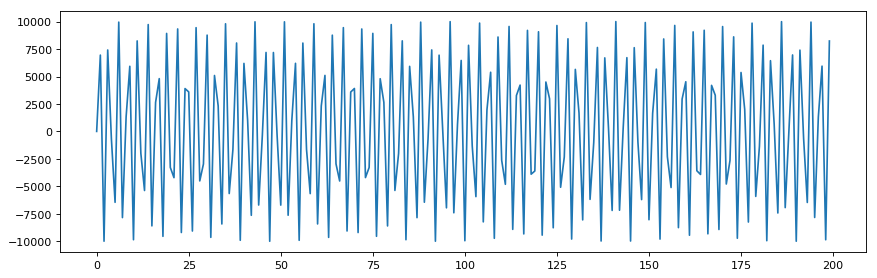

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 4), dpi=80)
plt.plot(tone[0:200])